Shape of dataset: (2200, 8)

Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Unique Crops: 22

Crop Types: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


C:\Users\fiar fly\AppData\Local\Temp\ipykernel_14992\1651006943.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='Greens_r')
C:\Users\fiar fly\AppData\Local\Temp\ipykernel_14992\1651006943.py:23: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\fiar fly\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


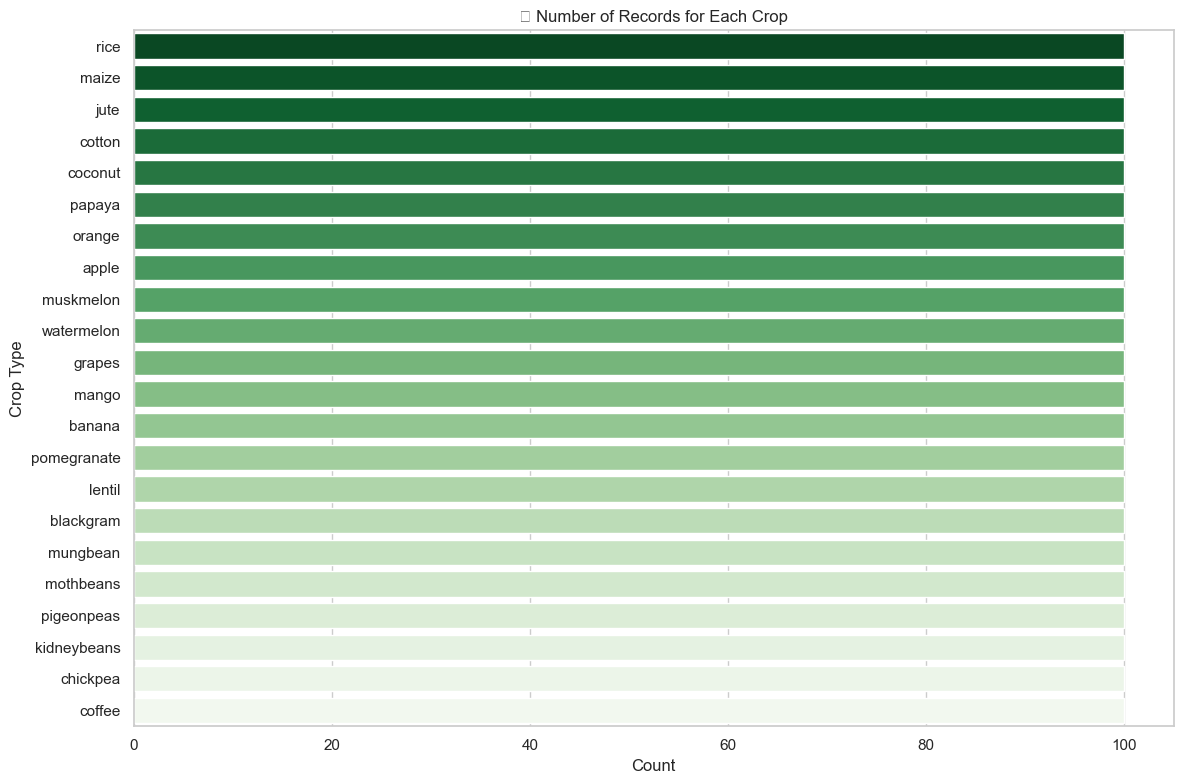

ValueError: could not convert string to float: 'rice'

<Figure size 1000x700 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# ---------- 1. Dataset Overview ----------
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nUnique Crops:", df['label'].nunique())
print("\nCrop Types:", df['label'].unique())

# ---------- 2. Crop Count Plot ----------
plt.figure(figsize=(12, 8))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='Greens_r')
plt.title('🌾 Number of Records for Each Crop')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

# ---------- 3. Feature Correlation Heatmap ----------
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.3)
plt.title('🌡️ Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# ---------- 4. N-P-K Distribution per Crop (Sample) ----------
selected_crops = ['rice', 'wheat', 'maize']
subset = df[df['label'].isin(selected_crops)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='N', y='P', hue='label', palette='Set2')
plt.title('🧪 N vs P for Selected Crops')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Phosphorous (P)')
plt.legend(title='Crop')
plt.tight_layout()
plt.show()

# ---------- 5. Average Features per Crop ----------
avg_features = df.groupby('label')[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].mean()

plt.figure(figsize=(14, 10))
sns.heatmap(avg_features, cmap='YlOrBr', annot=False)
plt.title("📊 Average Feature Values per Crop")
plt.xlabel("Features")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

# ---------- 6. Pair Plot (Optional, heavy) ----------
# sns.pairplot(df.sample(200), hue='label')
# plt.suptitle("📈 Pairplot of Features (Sample of 200)", y=1.02)
# plt.show()


C:\Users\fiar fly\AppData\Local\Temp\ipykernel_14992\568229070.py:9: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\fiar fly\AppData\Local\Temp\ipykernel_14992\568229070.py:9: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\fiar fly\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fiar fly\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


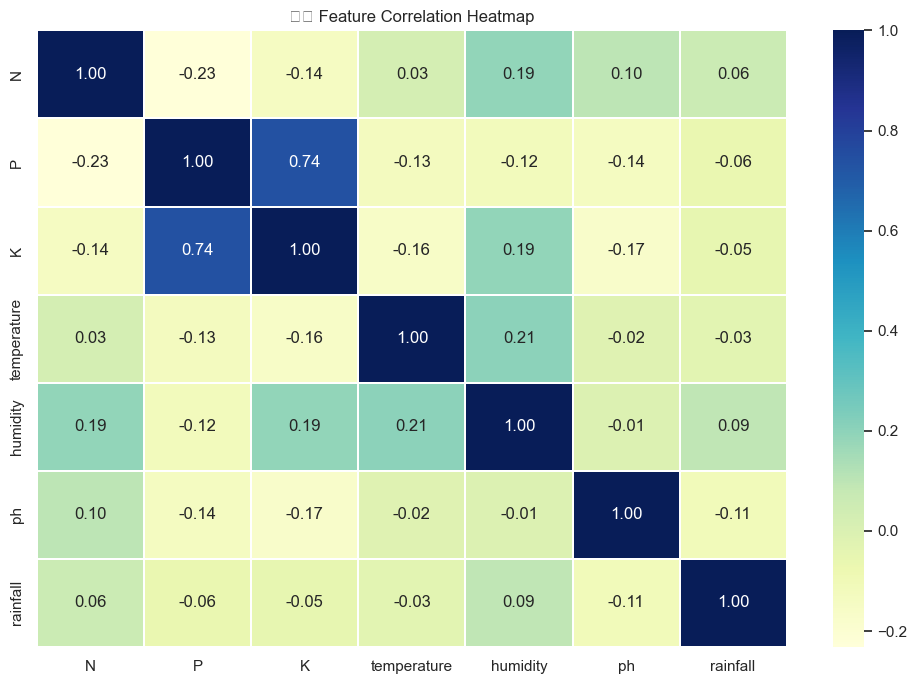

In [3]:
# ---------- 3. Feature Correlation Heatmap (Fixed) ----------
plt.figure(figsize=(10, 7))

# Exclude 'label' column to keep only numeric columns
numeric_df = df.drop('label', axis=1)

sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.3)
plt.title('🌡️ Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
